### Q1):      A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


     

### Ans:

In [1]:
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv("Cutlets (1).csv")
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
unitA = df['Unit A']
unitB = df['Unit B']

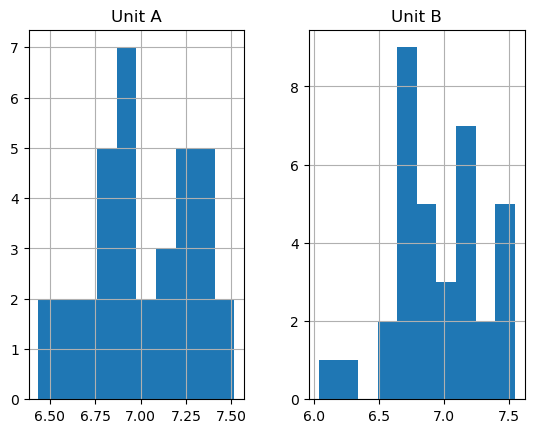

In [4]:
import matplotlib.pyplot as plt

df.hist()
plt.show()

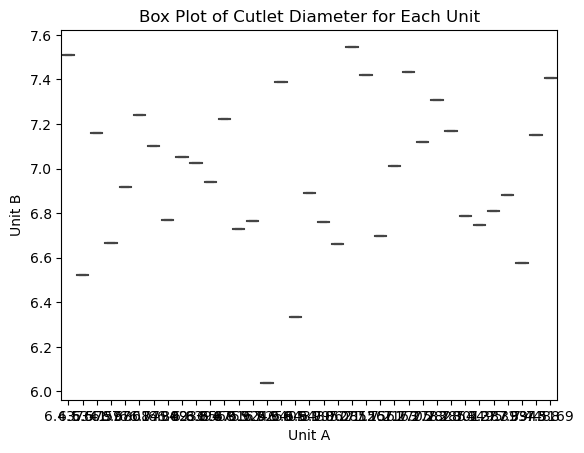

In [17]:
import seaborn as sns
sns.boxplot(x='Unit A', y='Unit B', data=df)
plt.title('Box Plot of Cutlet Diameter for Each Unit')
plt.show()

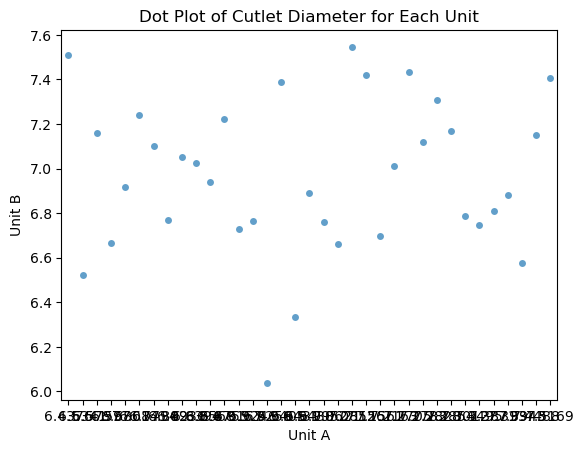

In [14]:
sns.stripplot(x='Unit A', y='Unit B', data=df, jitter=True, marker='o', alpha=0.7)
plt.title('Dot Plot of Cutlet Diameter for Each Unit')
plt.show()

* Check for any overlap of dots between the two units. There is substantial overlap, it may suggest similarity in the cutlet diameters between the units.

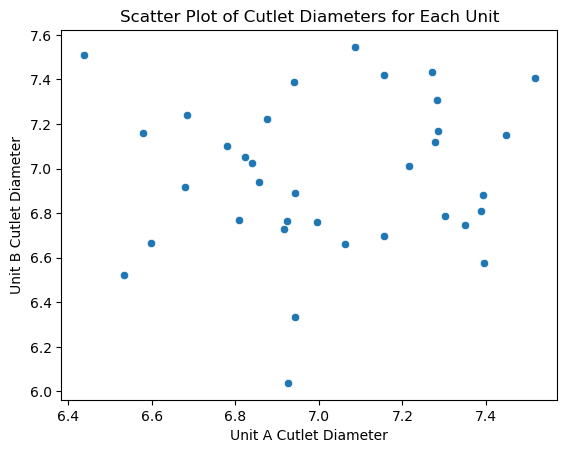

In [15]:
sns.scatterplot(x='Unit A', y='Unit B', data=df)
plt.title('Scatter Plot of Cutlet Diameters for Each Unit')
plt.xlabel('Unit A Cutlet Diameter')
plt.ylabel('Unit B Cutlet Diameter')
plt.show()

### Insights:

### Positive Correlation:

* The points tend to follow an upward trend, it suggests a positive correlation. Cutlet diameters in Unit B increase as cutlet diameters in Unit A increase.

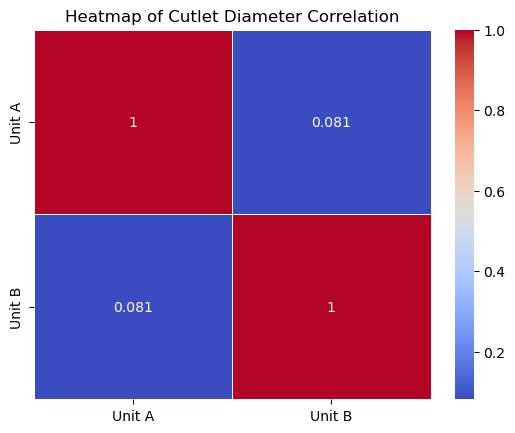

In [16]:
correlation_matrix = df[['Unit A', 'Unit B']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Cutlet Diameter Correlation')
plt.show()

### Insights:

* Darker colours in the heatmap represent higher cutlet diameters, while lighter colours indicate lower diameters.

* The values in the cells represent the average cutlet diameter for the corresponding combination of 'Unit A' and 'Unit B'.

In [ ]:
_, p_var = stats.levene(unitA, unitB)

In [11]:
if p_var > 0.05:
    print("The variances are homogeneous (p-value =", p_var, ")")
else:
    print("The variances are not homogeneous (p-value =", p_var, ")")

The variances are homogeneous (p-value = 0.4176162212502553 )


In [13]:
from statsmodels.stats.weightstats import ttest_ind

In [15]:
t_stat, p_val, _ = ttest_ind(unitA, unitB)
print("T-test results:")
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-test results:
T-statistic: 0.7228688704677945
P-value: 0.47223947245995745


In [17]:
alpha = 0.05  
if p_val < alpha:
    print("There is a significant difference in the diameter of the cutlets.")
else:
    print("There is no significant difference in the diameter of the cutlets.")

There is no significant difference in the diameter of the cutlets.


In [25]:
from scipy.stats.contingency import chi2_contingency
stat,p,dof,expected=chi2_contingency(df)

In [22]:
alpha=0.05

print("P value is" + str(p))
if p<alpha:
    print(" There is a significant difference in the diameter of the cutlets.(Reject Ho)")
else:
    print("There is no significant difference in the diameter of the cutlets.(Ho holds true)")


P value is0.0005507538384061118
 There is a significant difference in the diameter of the cutlets.(Reject Ho)


### Q2)  A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  ### Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [19]:
df = pd.read_csv("LabTAT (1).csv")
df.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [20]:
from scipy.stats import f_oneway

In [21]:
f_statistic, p_value = f_oneway(df['Laboratory 1'],df['Laboratory 2'],df['Laboratory 3'],df['Laboratory 4'])

In [22]:
alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in the average TAT among the laboratories.")
else:
    print("There is no significant difference in the average TAT among the laboratories.")

There is a significant difference in the average TAT among the laboratories.


### Q3)  Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

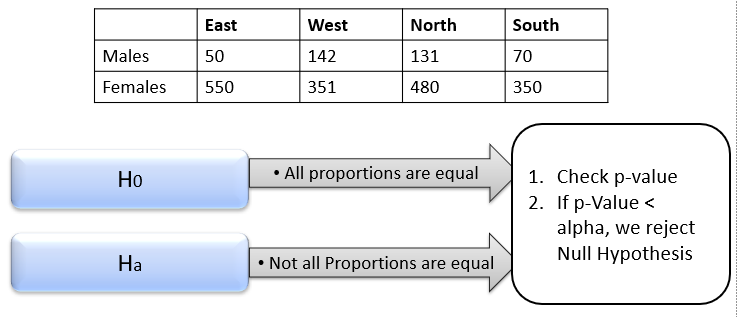

### Ans:

In [1]:
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
east = np.array([50, 550])
west = np.array([142, 351])
north = np.array([131, 480])
south = np.array([70, 350])

In [3]:
data = np.array([east, west, north, south])

In [4]:
chi2_stat, p_value, _, _ = chi2_contingency(data)

In [5]:
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-square Statistic: 80.27295426602495
P-value: 2.682172557281901e-17


In [6]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in male-female buyer ratios across regions.")
else:
    print("Fail to reject the null hypothesis. Male-female buyer ratios are similar across regions.")


Reject the null hypothesis. There is a significant difference in male-female buyer ratios across regions.
